In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as plt
%matplotlib inline

/Users/varya_hai/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/varya_hai/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('/Users/varya_hai/Library/Mobile Documents/com~apple~CloudDocs/karpov.courses - Аналитик данных/Karpov.courses 01/7 СТАТИСТИКА/2.9 conversion.csv')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [4]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [30]:
data = np.log(df.groupby(['xyz_campaign_id','fb_campaign_id']).Impressions.sum()).reset_index()
data.head()

,xyz_campaign_id,fb_campaign_id,Impressions
0,916,103916,8.902456
1,916,103917,9.790375
2,916,103920,6.541030
3,916,103928,9.035034
4,916,103929,7.557473


<AxesSubplot:xlabel='Impressions', ylabel='Count'>

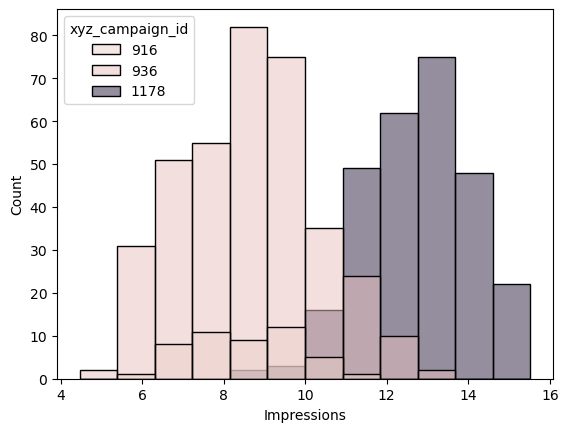

In [34]:
sns.histplot(data, x='Impressions', hue='xyz_campaign_id')

In [8]:
df['ctr'] = df['Clicks'] / df['Impressions']

In [9]:
df.ctr.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: ctr, dtype: float64

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='ctr'>

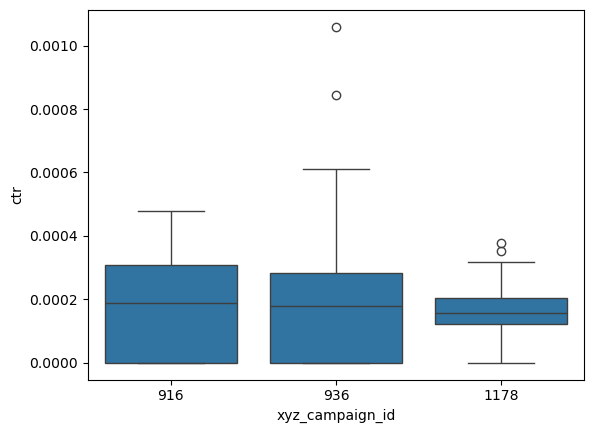

In [13]:
sns.boxplot(df, x='xyz_campaign_id', y='ctr')